In [96]:
words = open('names.txt', 'r').read().splitlines()

In [97]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [98]:
len(words)

32033

In [99]:
min(len(w) for w in words)

2

In [100]:
max(len(w) for w in words)

15

In [101]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)

        # adds up all bigrams and updates the counts of each
        b[bigram] = b.get(bigram, 0) + 1

In [102]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [103]:
import torch

In [104]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [105]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [106]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

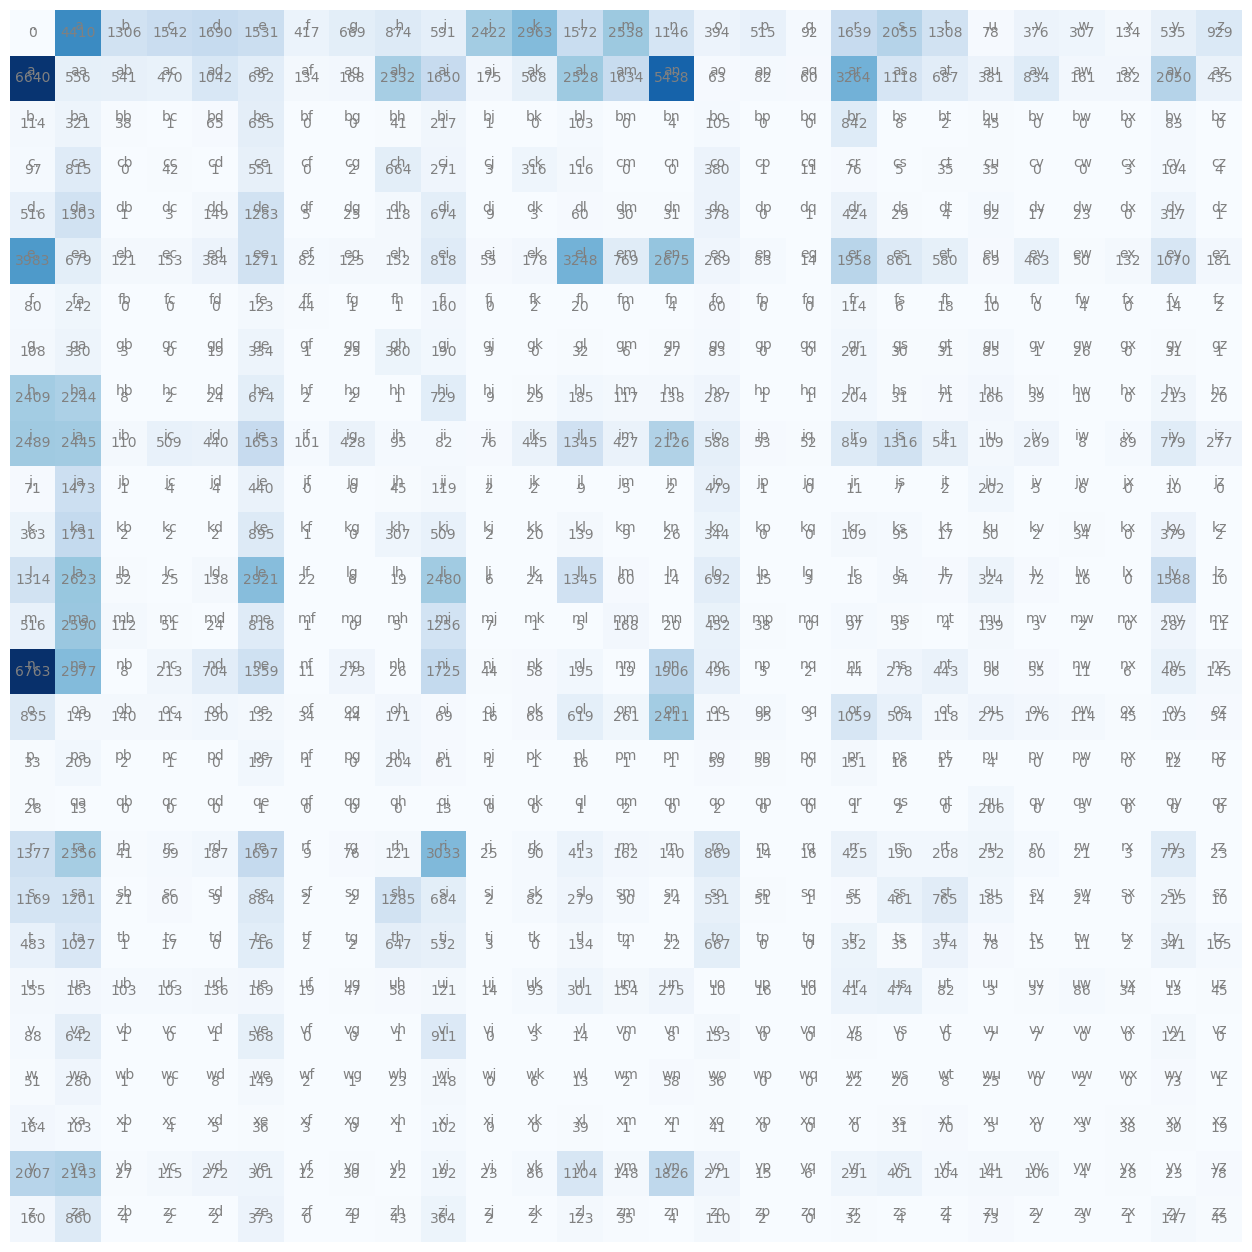

In [107]:
import matplotlib.pylab as plt

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='center', color='gray')
plt.axis('off')



In [108]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [109]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [110]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'c'

In [111]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p /p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [112]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [113]:
# probability matrix
P = (N+1).float() # model smoothing by adding one, gets rid of 0 prob in matrix
P /= P.sum(dim=1, keepdim=True) # element wise division
P

tensor([[3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
         1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
         4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
         5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
         4.2109e-03, 1.6719e-02, 2.9008e-02],
        [1.9583e-01, 1.6425e-02, 1.5983e-02, 1.3889e-02, 3.0756e-02, 2.0435e-02,
         3.9809e-03, 4.9835e-03, 6.8796e-02, 4.8685e-02, 5.1899e-03, 1.6779e-02,
         7.4575e-02, 4.8213e-02, 1.6039e-01, 1.8872e-03, 2.4475e-03, 1.7988e-03,
         9.6279e-02, 3.2997e-02, 2.0288e-02, 1.1264e-02, 2.4623e-02, 4.7771e-03,
         5.3963e-03, 6.0480e-02, 1.2857e-02],
        [4.3039e-02, 1.2051e-01, 1.4596e-02, 7.4850e-04, 2.4701e-02, 2.4551e-01,
         3.7425e-04, 3.7425e-04, 1.5719e-02, 8.1587e-02, 7.4850e-04, 3.7425e-04,
         3.8922e-02, 3.7425e-04, 1.8713e-03, 3.9671e-02, 3.7425e-04, 3.7425e-04,
         3.1549e-

In [114]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    
    out = []
    ix = 0
    while True:

        p = P[ix]

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


In [115]:
log_likelihood = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [116]:
# Goal: Maximize likelihood of the data w.r.t model parameters (statistical modeling)
# maximizing the log likelihood
# or minimizing the negative log likelihood
# or minimizing the average negative log likelihood

In [117]:
# create the training set of bigrams (x, y) inputs and the labels
xs, ys = [], []
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [118]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc


tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [119]:
xenc.shape # int datatype

torch.Size([5, 27])

In [120]:
W = torch.randn((27, 27)) # fills tensor with normal dist. numbers
xenc @ W

tensor([[-0.2745, -0.7083,  1.5503, -1.1604, -0.2471,  0.1924, -0.3697, -0.0143,
          1.5800,  0.8583, -0.5541,  1.4072,  0.5738,  0.1084, -0.3877,  0.0316,
         -1.2469, -0.4118,  1.9756,  0.0605,  1.1029,  1.5178, -0.4001, -1.2827,
         -1.0187, -0.6689, -0.9762],
        [-0.7909, -0.5884,  0.1077,  2.3327,  0.2493, -0.7240,  0.0482, -0.8323,
         -0.2225,  1.4129, -2.4688, -2.0477,  0.4112, -0.2630, -0.1735, -0.7168,
          0.0788,  0.0105,  0.4452, -1.2660, -1.4324, -0.1750,  0.6520, -0.2073,
          1.6937,  0.7287, -0.2166],
        [ 1.6256,  0.1342,  0.4406, -1.7840, -0.6274, -0.6964, -0.3599,  0.0742,
         -0.2767, -1.1750,  0.3848, -1.6680, -0.1988,  0.5309, -0.2591, -1.3831,
          1.1555,  0.6598, -1.4809,  0.6541,  1.3111,  0.9219,  1.4246, -0.7160,
         -0.2877, -0.0645, -0.0211],
        [ 1.6256,  0.1342,  0.4406, -1.7840, -0.6274, -0.6964, -0.3599,  0.0742,
         -0.2767, -1.1750,  0.3848, -1.6680, -0.1988,  0.5309, -0.2591, -1.3831

In [121]:
logits = xenc @ W # log counts
counts = logits.exp() 
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0167, 0.0108, 0.1038, 0.0069, 0.0172, 0.0267, 0.0152, 0.0217, 0.1069,
         0.0519, 0.0127, 0.0899, 0.0391, 0.0245, 0.0149, 0.0227, 0.0063, 0.0146,
         0.1588, 0.0234, 0.0663, 0.1005, 0.0148, 0.0061, 0.0080, 0.0113, 0.0083],
        [0.0112, 0.0137, 0.0275, 0.2546, 0.0317, 0.0120, 0.0259, 0.0107, 0.0198,
         0.1015, 0.0021, 0.0032, 0.0373, 0.0190, 0.0208, 0.0121, 0.0267, 0.0250,
         0.0386, 0.0070, 0.0059, 0.0207, 0.0474, 0.0201, 0.1344, 0.0512, 0.0199],
        [0.1344, 0.0302, 0.0411, 0.0044, 0.0141, 0.0132, 0.0184, 0.0285, 0.0201,
         0.0082, 0.0389, 0.0050, 0.0217, 0.0450, 0.0204, 0.0066, 0.0840, 0.0512,
         0.0060, 0.0509, 0.0981, 0.0665, 0.1099, 0.0129, 0.0198, 0.0248, 0.0259],
        [0.1344, 0.0302, 0.0411, 0.0044, 0.0141, 0.0132, 0.0184, 0.0285, 0.0201,
         0.0082, 0.0389, 0.0050, 0.0217, 0.0450, 0.0204, 0.0066, 0.0840, 0.0512,
         0.0060, 0.0509, 0.0981, 0.0665, 0.1099, 0.0129, 0.0198, 0.0248, 0.0259],
        [0.0316, 0.0133,

In [122]:
probs.shape

torch.Size([5, 27])

In [123]:
probs[0].sum()

tensor(1.)

In [124]:
#### ----------------------------------------- ####

In [134]:
# create the training set of bigrams (x, y) inputs and the labels
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# randomlu initalize 27 neurons' weights
# each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
w = torch.randn((27,27), generator=g, requires_grad=True)

number of examples:  228146


In [140]:
(w**2).mean() # normalize 

tensor(2.1081, grad_fn=<MeanBackward0>)

In [141]:
# training loop
for k in range(100):

    # forward pass into network
    xenc = F.one_hot(xs, num_classes=27).float() # one hot encode the input
    logits = xenc @ w # input the encoded input into network
    counts = logits.exp() 
    probs = counts/counts.sum(1, keepdims=True) # outputs the prob for all 27 characters being the next character
    loss = - probs[torch.arange(num), ys].log().mean() + 0.01* (w**2).mean()
    print(loss.item())

    # backwards pass
    w.grad = None # setting gradient to zero
    loss.backward()

    # update weights ( the constant is the learning rate)
    w.data += -50 * w.grad

2.4834256172180176
2.4833853244781494
2.4833481311798096
2.4833130836486816
2.483279228210449
2.4832472801208496
2.4832162857055664
2.483186721801758
2.4831573963165283
2.4831297397613525
2.483102560043335
2.483076333999634
2.4830503463745117
2.483025550842285
2.4830009937286377
2.4829771518707275
2.4829540252685547
2.482930898666382
2.4829087257385254
2.4828872680664062
2.482865571975708
2.482844591140747
2.4828240871429443
2.4828040599823
2.4827840328216553
2.482764720916748
2.482745409011841
2.482726812362671
2.48270845413208
2.48268985748291
2.4826724529266357
2.482654571533203
2.482637405395508
2.4826204776763916
2.4826035499572754
2.4825870990753174
2.4825706481933594
2.4825544357299805
2.4825387001037598
2.482522964477539
2.4825074672698975
2.482492446899414
2.4824774265289307
2.4824624061584473
2.482448101043701
2.482433319091797
2.482419013977051
2.4824047088623047
2.482390880584717
2.482377290725708
2.48236346244812
2.4823501110076904
2.48233699798584
2.48232364654541
2.48231

In [147]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    
    out = []
    ix = 0
    while True:
        
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float() # one hot encode the input
        logits = xenc @ w # input the encoded input into network
        counts = logits.exp() 
        p = counts / counts.sum(1, keepdims=True)

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

cexze.
momasurailezityha.
konimittain.
llayn.
ka.
